In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


sns.set_theme()

## Data load

In [2]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [3]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [4]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [5]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [6]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


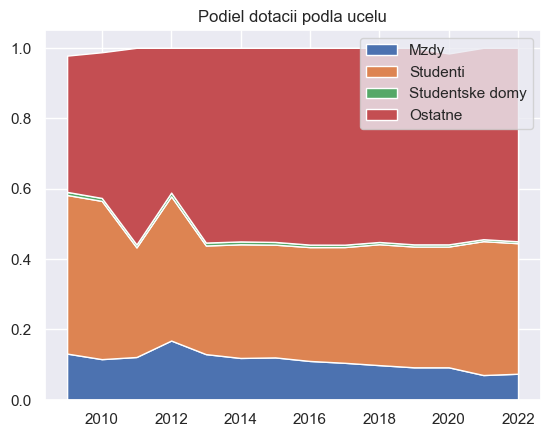

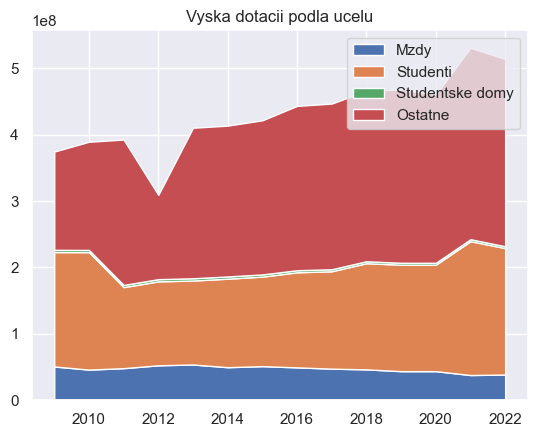

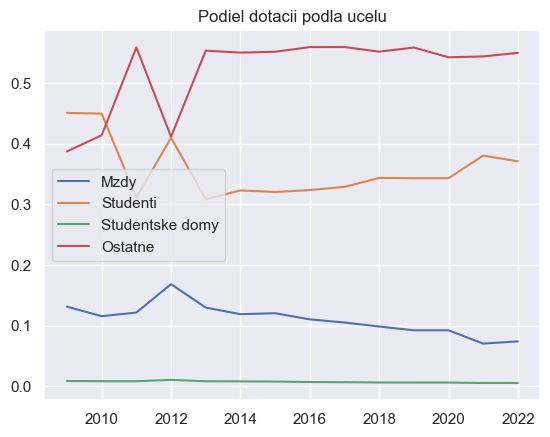

In [7]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [8]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']

In [9]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types['ucitelia_spolu'] = sum([teachers_types[col] for col in ['asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']])
display(teachers_types)
teachers_types.to_csv('../data/preprocessed/teachers_types_simplified.csv', index = False)

,uni,year,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget,ucitelia_spolu
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749,103.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444,105.5
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907,115.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816,115.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047,120.5
...,...,...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800,583.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0,10994390,577.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0,10994390,564.5
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0,13183264,540.0


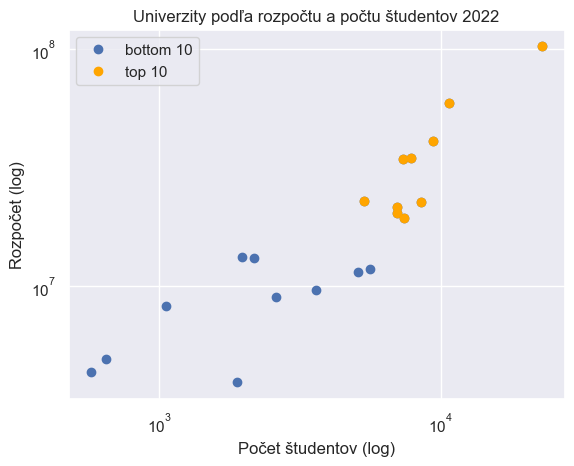

In [10]:
plt.plot(budget_raw.query('year == 2022')['students'], budget_raw.query('year == 2019')['budget'], 'o')
plt.loglog()
pass

top10 = budget_raw.query('year==2022').sort_values('budget', ascending=False).head(10)['uni'].unique()
budget = budget_raw.query('uni in @top10')
plt.plot(budget.query('year == 2022')['students'], budget.query('year == 2019')['budget'], 'o', color = 'orange')
plt.title('Univerzity podľa rozpočtu a počtu študentov 2022')
plt.xlabel('Počet študentov (log)')
plt.ylabel('Rozpočet (log)')
plt.legend(['bottom 10', 'top 10'])
plt.show()

## Regresna analyza

In [11]:
from sklearn.linear_model import LinearRegression

Pozn. pracujeme s agregovanymi datami zamestnancov, pricom pozname len stavy full-time/part-time, nie presnu vymeru uvazku.
Toto predstavuje problem, pretoze nam to skresluje realny pocet zamestnancov (lepsie by bolo pracovat s osobohodianmi).
Pre ucely analyzy udavame jednotnu vahu part-time uvazkom 0.5, aby sme aspon ciastocne zmiernili tento efekt, no nie je to idealne riesenie.

Nizsie je vztah medzi poctom studentov a ucitelov jednotlivych univerzit v priebehu rokov.
Kazdy graf zachytava jednu fakultu v obdobi r. 2014-2022.
Body na grafe su jednotlive roky, pricom sme body pospajali sipkami, aby sme videli aj evoluciu, ako sa stav menil v case.
Cierna priamka je linerna regresna priamka vysvetlujuca pocet ucitelov v zavislosti od poctu studentov.

Vidime, ze na vacsine univerzit je tento vztah lokalne linearny, korelacne koeficienty su az na niekolko vynimiek (PU 0.29, TUKE 0.59, UPJS -0.65) vysoke (viac ako 0.8 v absolutnej hodnote).
Jedine dve univerzity s negativnym vztahom su UK a UPJS, na oboch skolach v priebehu rokov klesa pocet studentov a zaroven rastie pocet ucitelov.
Ostatne sledovane univerzity maju velmi podobny vyvoj, sucasne klesa pocet studentov aj ucitelov.
Touto vizualizaciou vyjadrujeme len korelaciu, nie kauzalitu, no kedze vidime celu krivku vyvoja, z grafov sa zda, ze prebieha korekcia - po sebe nasledujuce body (roky) su casto striedavo nad a pod krivkou,
takze interpretacia by mohla byt, ze jedna velicina "reaguje" na zmenu druhej.

,uni,corr,coef,intercept
0,EU,0.970,0.041,141.3
1,TUKE,0.599,0.017,583.4
2,SPU,0.945,0.014,330.4
3,UK,-0.956,-0.044,3251.7
4,UKF,0.829,0.015,386.3
5,PU,0.289,0.008,472.5
6,UMB,0.844,0.023,300.9
7,UPJŠ,-0.652,-0.074,1280.3
8,STU,0.974,0.031,566.7
9,ŽU,0.961,0.023,375.1


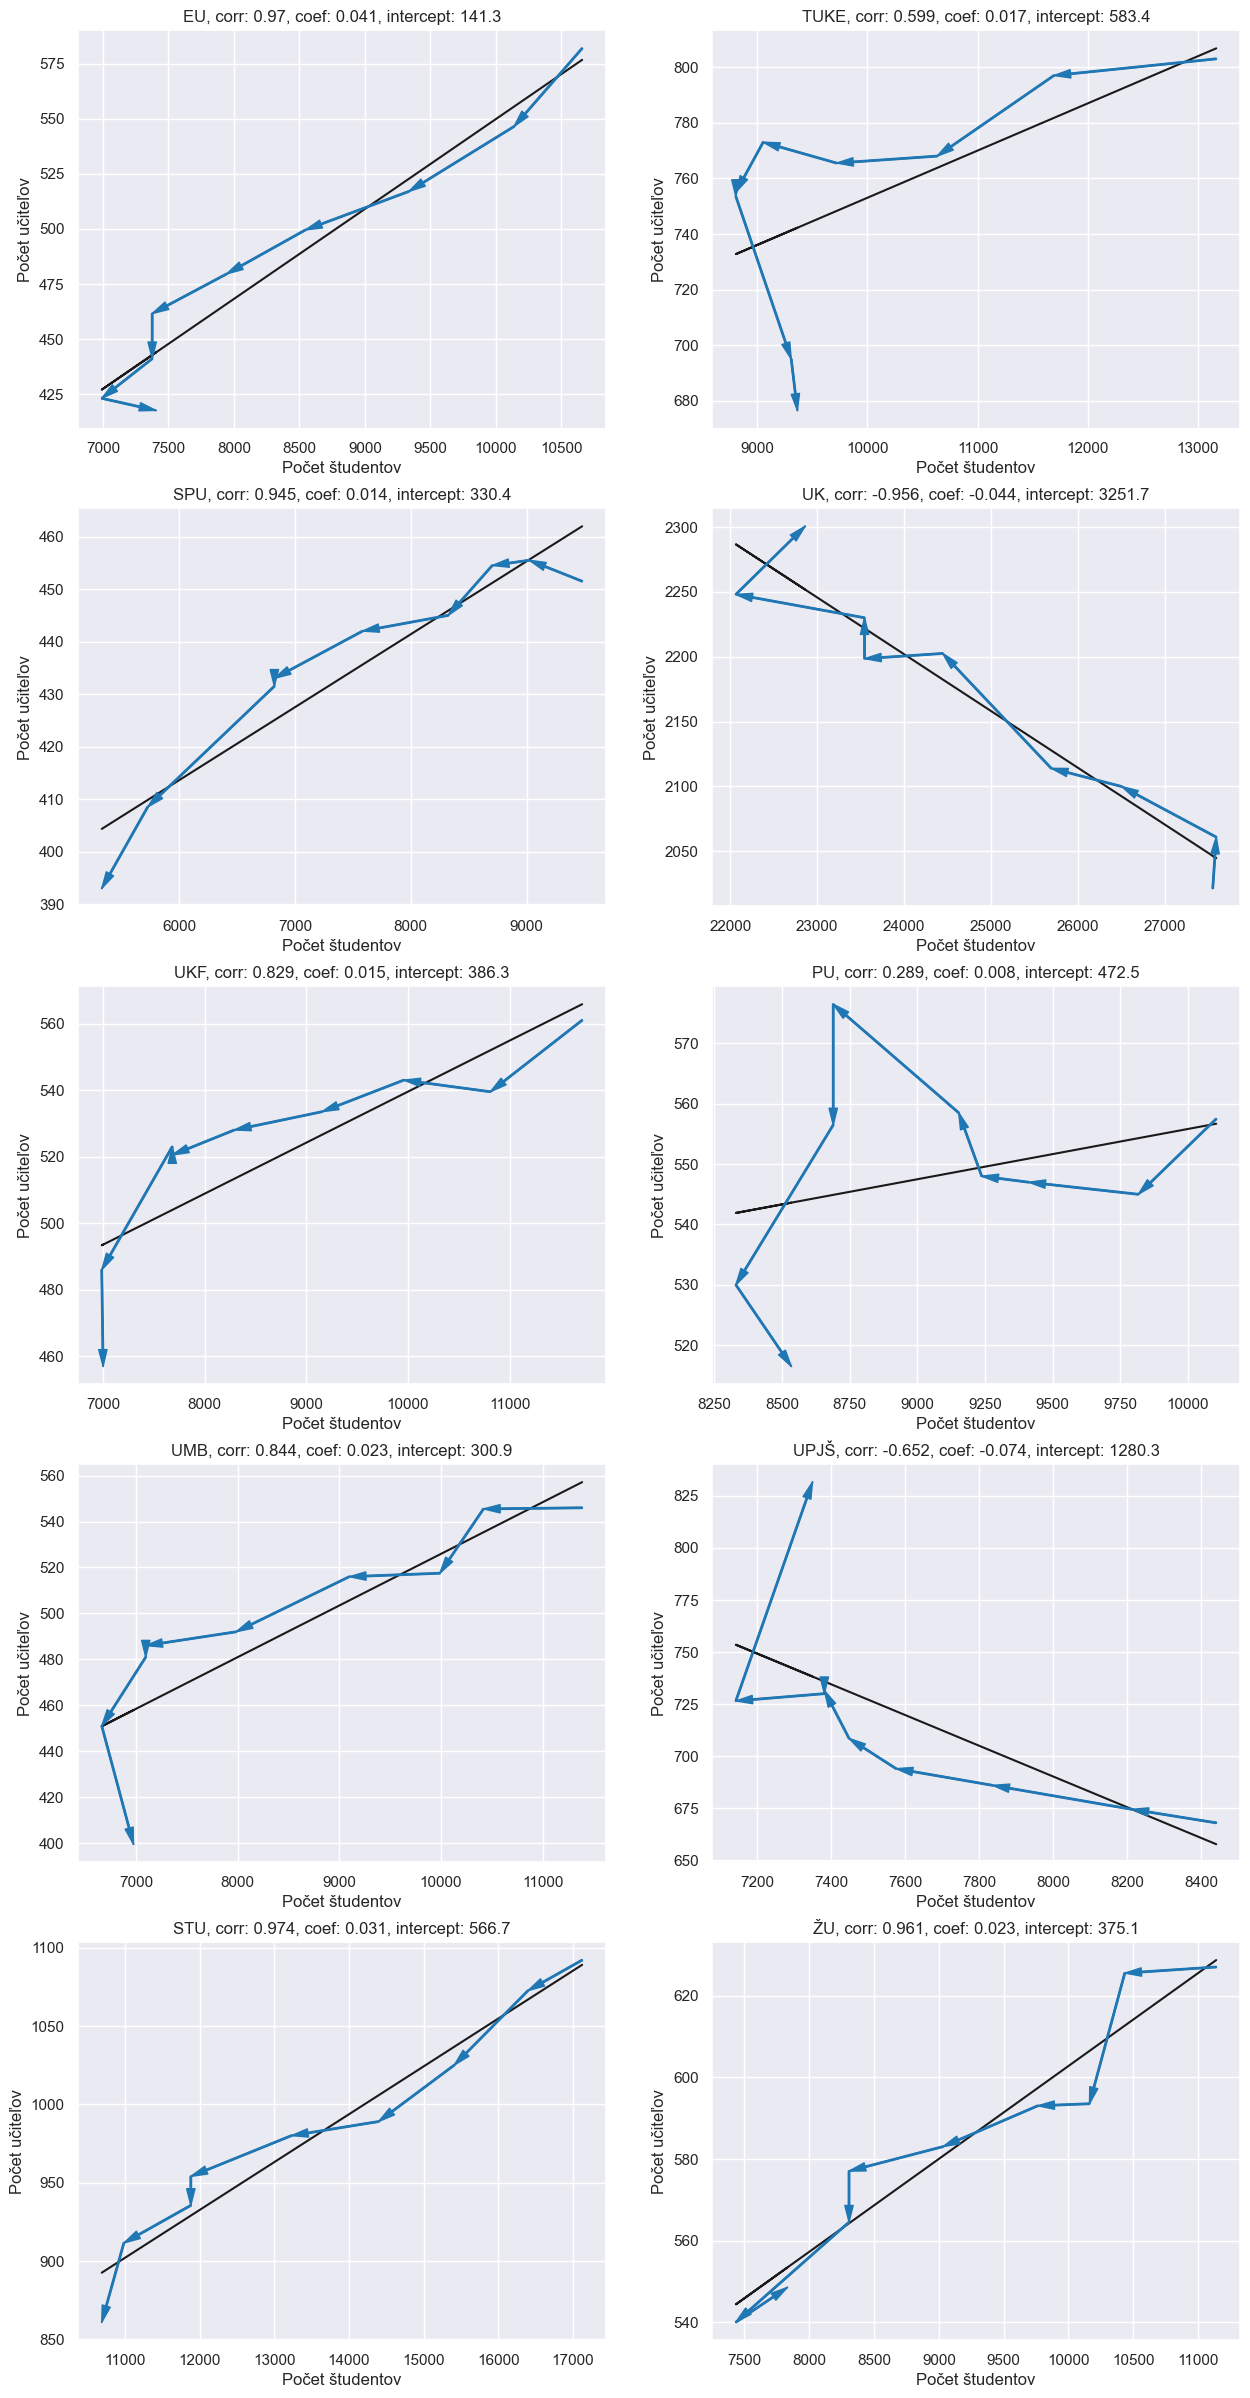

In [13]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students', 'inflation_rate']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

students_teachers_data = []

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Počet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_students_teachers.T[0],y_students_teachers)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    students_teachers_data.append((uni, corr, coef, intercept))

students_teachers_df = pd.DataFrame(students_teachers_data, columns = ['uni', 'corr', 'coef', 'intercept'])
display(students_teachers_df)

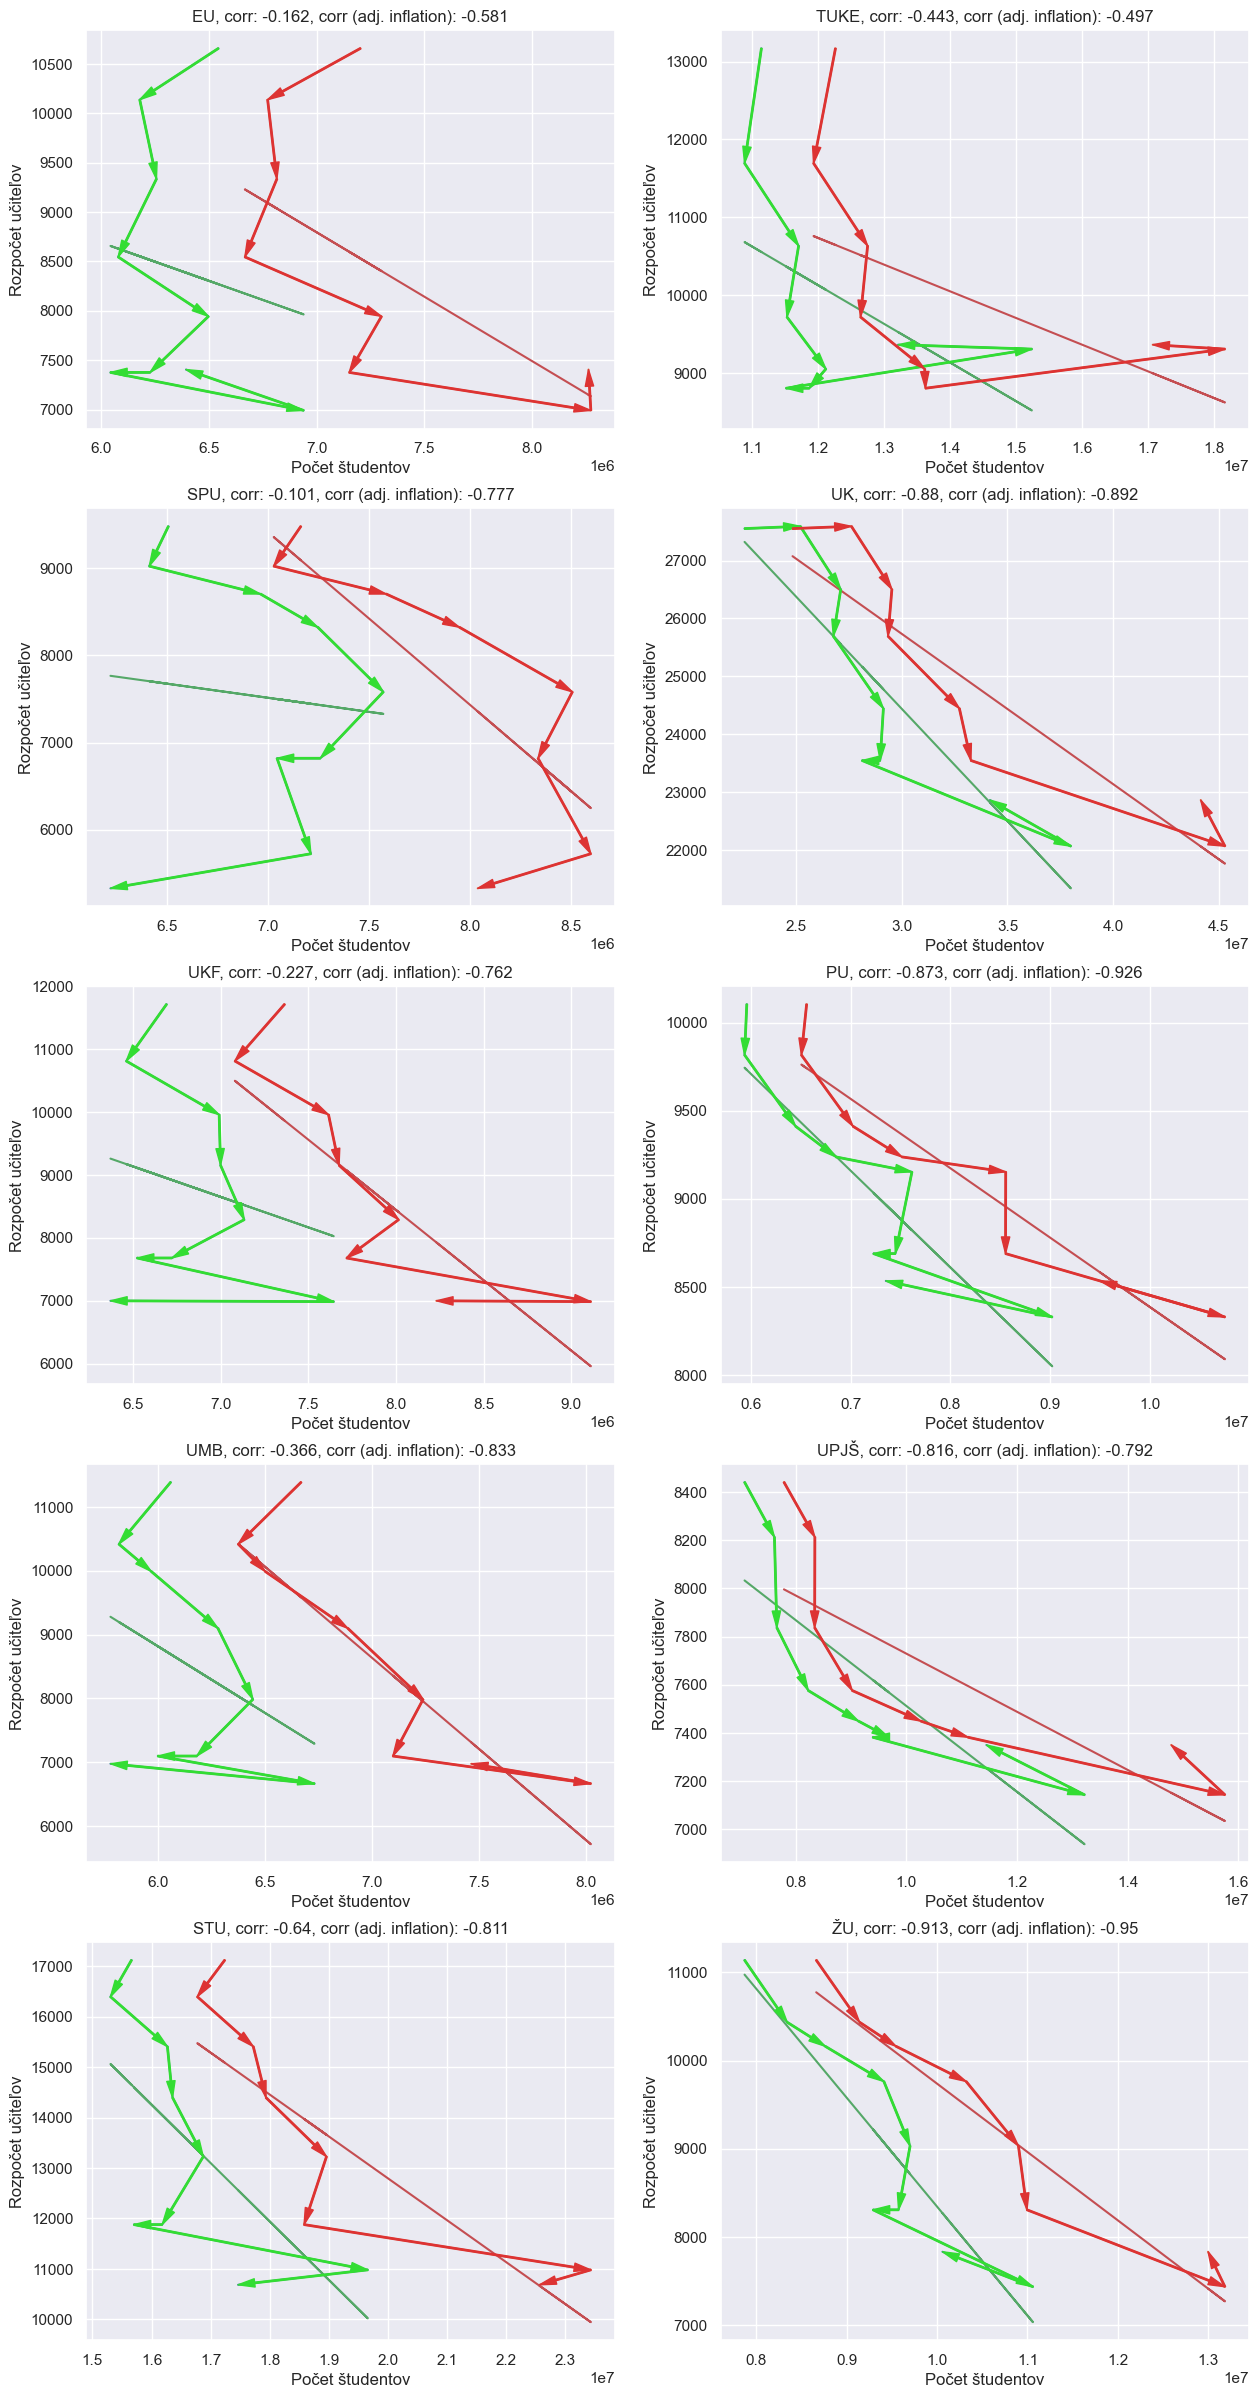

In [28]:
budget_raw['budget_wo_salary'] = (budget_raw['budget'] - budget_raw['salary_budget'])
budget_raw['budget_wo_salary_ia'] = budget_raw['budget_wo_salary'] / budget_raw['inflation_rate']
budget_raw['salary_budget_ia'] = budget_raw['salary_budget'] / budget_raw['inflation_rate']
budget_raw['students_budget_ia'] = budget_raw['students_budget'] / budget_raw['inflation_rate']

features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students_budget_ia', 'students', 'salary_budget_ia', 'budget_wo_salary_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

students_teachers_data = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model1, model2 = LinearRegression(), LinearRegression()
    X2 = features.query('uni == @uni and year > 2013')[['salary_budget']].values
    X1 = features.query('uni == @uni and year > 2013')[['salary_budget_ia']].values
    y = features.query('uni == @uni and year > 2013')['students']
    model1.fit(X1, y)
    model2.fit(X2, y)
    
    for t in range(len(y)-1):
        ax[r][c].annotate('',xy=(X1[t+1][0], list(y)[t+1]),xytext=(X1[t][0], list(y)[t]),
        arrowprops=dict(color='#33dd33', width=1,headwidth=6))
    
    
    for t in range(len(y)-1):
        ax[r][c].annotate('',xy=(X2[t+1][0], list(y)[t+1]),xytext=(X2[t][0], list(y)[t]),
        arrowprops=dict(color='#dd3333', width=1,headwidth=6))

    y_pred1 = model1.predict(X1)
    y_pred2 = model2.predict(X2)
    ax[r][c].plot(X1, y, '-') 
    ax[r][c].plot(X2, y, '-') 
    ax[r][c].plot(X1, y_pred1, color='g')
    ax[r][c].plot(X2, y_pred2, color='r')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Rozpočet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    # coef1 = round(model1.coef_[0],6)
    # intercept1 = round(model1.intercept_,1)
    corr1 = round(np.corrcoef(X1.T[0],y)[0, 1], 3)
    corr2 = round(np.corrcoef(X2.T[0],y)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr1}, corr (adj. inflation): {corr2}')
    # students_teachers_data.append((uni, corr, coef, intercept))

# students_teachers_df = pd.DataFrame(students_teachers_data, columns = ['uni', 'corr', 'coef', 'intercept'])
# display(students_teachers_df)
    

## Some články data


,year,uni,budget_ia,pub_07711,pub_07712
100,2014,UK,79204500.0,21.094113,30.217487
101,2014,UPJŠ,22748974.0,5.717271,8.952648
102,2014,PU,18269884.0,6.567317,3.961672
105,2014,UKF,18345396.0,6.600709,5.327423
106,2014,UMB,17455044.0,6.234505,4.158509
...,...,...,...,...,...
268,2022,STU,51672264.0,10.793734,12.152142
269,2022,TUKE,38858730.0,10.553171,10.979593
270,2022,ŽU,28058188.0,5.780330,5.752234
272,2022,EU,15411542.0,2.762610,1.857100


,uni,corr,coef,intercept
0,UK,0.773,0.0,10.2
1,UPJŠ,0.791,0.0,-5.9
2,PU,-0.350,-0.0,9.1
3,UKF,0.017,0.0,4.6
4,UMB,0.185,0.0,3.1
5,STU,0.028,0.0,11.0
6,TUKE,0.027,0.0,10.3
7,ŽU,0.575,0.0,-0.9
8,EU,0.768,0.0,-8.1
9,SPU,-0.475,-0.0,7.2


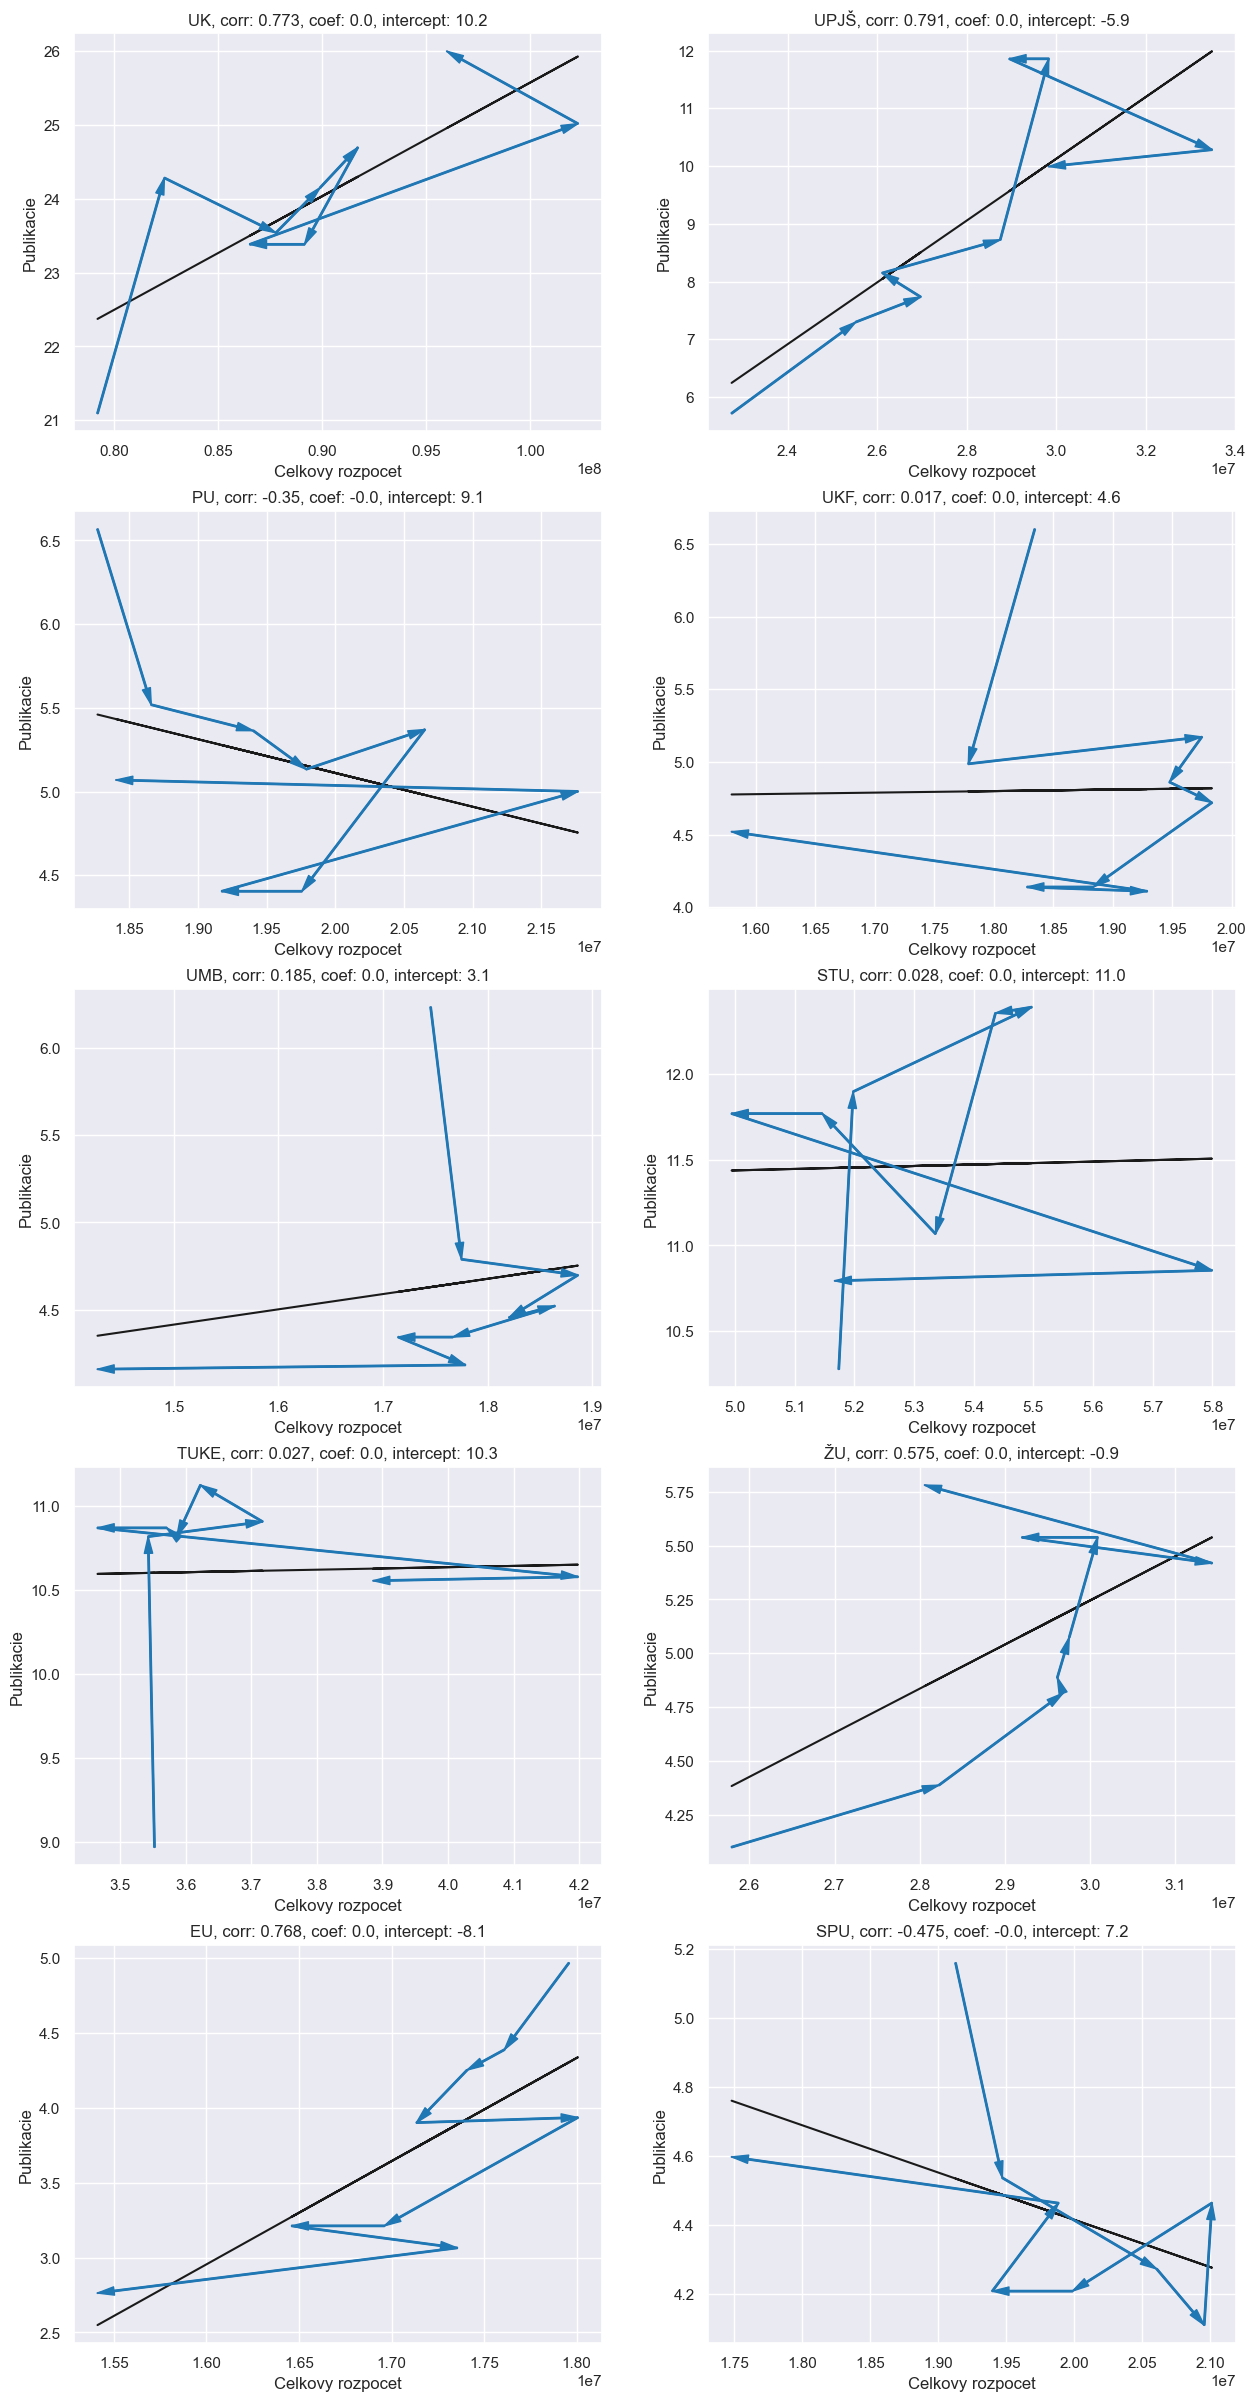

In [30]:
pub = budget_raw.query('year > 2013 and uni in @top10')[['year', 'uni', 'budget_ia', 'pub_07711', 'pub_07712']]
display(pub)
pub_data = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(pub['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_lr = pub.query('uni == @uni')[['budget_ia']].values
    y_lr = pub.query('uni == @uni')['pub_07711']
    model.fit(X_lr, y_lr)
    model.coef_
    
    for t in range(len(y_lr)-1):
        ax[r][c].annotate('',xy=(X_lr[t+1][0], list(y_lr)[t+1]),xytext=(X_lr[t][0], list(y_lr)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_lr)
    ax[r][c].plot(X_lr, y_lr, '-') 
    ax[r][c].plot(X_lr, y_pred, color='k')
    ax[r][c].set_xlabel('Celkovy rozpocet')
    ax[r][c].set_ylabel('Publikacie')
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_lr.T[0],y_lr)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    pub_data.append((uni, corr, coef, intercept))

pub_df = pd.DataFrame(pub_data, columns = ['uni', 'corr', 'coef', 'intercept'])
display(pub_df)
    

## Clustrovanie podľa typov vyučujúcich

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.cluster import KMeans

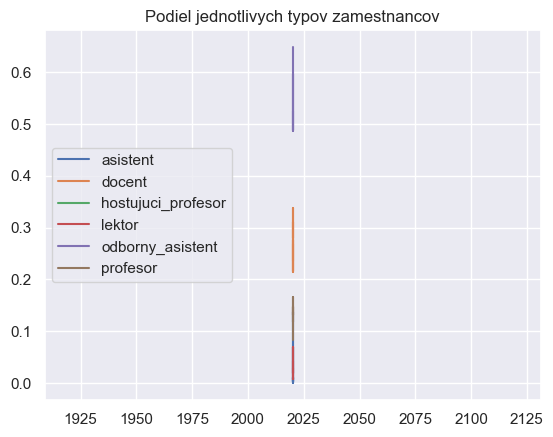

In [34]:
teachers_share = (teachers_types.query('year == 2020 and uni in @top10')
.iloc[:, :8]
.set_index(['year', 'uni']))

teachers_share['total'] = sum([teachers_share[col] for col in teachers_share.columns])


for col in teachers_share.columns:
    teachers_share[col] /= teachers_share['total']

teachers_share = teachers_share.iloc[:, :-1]

plt.plot(teachers_share.reset_index()['year'], teachers_share, label=teachers_share.columns)
plt.title('Podiel jednotlivych typov zamestnancov')
plt.legend(loc='center left')
plt.show()


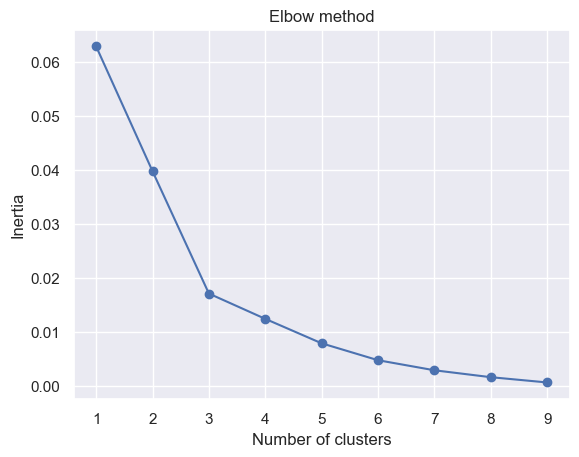

In [35]:
inertias = []


for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(teachers_share.values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# elbow metodou vyberame 3 clustre

In [36]:
# finalne rozdelime do clustrov

kmeans = KMeans(n_clusters=3)
kmeans.fit(teachers_share.values)
clusters = kmeans.predict(teachers_share.values)
teachers_share['cluster_id'] = clusters
teachers_share['cluster_id'] = teachers_share['cluster_id'].astype(str)
teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2020 EU    0.002268  0.235828                 0.0  0.029478          0.648526   
     PU    0.008985  0.238095                 0.0  0.069182          0.582210   
     SPU   0.002317  0.310545                 0.0  0.013905          0.533024   
     STU   0.012293  0.280599                 0.0  0.008017          0.532336   
     TUKE  0.003318  0.337094                 0.0  0.013271          0.485733   
     UK    0.068610  0.216816                 0.0  0.028251          0.555157   
     UKF   0.000000  0.276291                 0.0  0.019120          0.558317   
     UMB   0.003119  0.264033                 0.0  0.018711          0.595634   
     UPJŠ  0.137671  0.213699                 0.0  0.021233          0.488356   
     ŽU    0.017715  0.267493                 0.0  0.041630          0.524358   

           profesor cluster_id  
year uni                        
2020 EU    0.083900          2  
     PU    0.101527          2  
     SPU   0.140209          1  
     STU   0.166756          1  
     TUKE  0.160584          1  
     UK    0.131166          0  
     UKF   0.146272          1  
     UMB   0.118503          2  
     UPJŠ  0.139041          0  
     ŽU    0.148804          1

In [37]:
# clustre vizualizujeme pomocou PCA

X = teachers_share.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [38]:
# doplname data z pca do dataframeu

X_pca
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=teachers_share.index).reset_index()
teachers_share['x1'] = list(df_pca['x1'])
teachers_share['x2'] = list(df_pca['x2'])

teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2020 EU    0.002268  0.235828                 0.0  0.029478          0.648526   
     PU    0.008985  0.238095                 0.0  0.069182          0.582210   
     SPU   0.002317  0.310545                 0.0  0.013905          0.533024   
     STU   0.012293  0.280599                 0.0  0.008017          0.532336   
     TUKE  0.003318  0.337094                 0.0  0.013271          0.485733   
     UK    0.068610  0.216816                 0.0  0.028251          0.555157   
     UKF   0.000000  0.276291                 0.0  0.019120          0.558317   
     UMB   0.003119  0.264033                 0.0  0.018711          0.595634   
     UPJŠ  0.137671  0.213699                 0.0  0.021233          0.488356   
     ŽU    0.017715  0.267493                 0.0  0.041630          0.524358   

           profesor cluster_id        x1        x2  
year uni                                            
2020 EU    0.083900          2  3.114834  0.110762  
     PU    0.101527          2  2.788908  0.629402  
     SPU   0.140209          1 -0.776448 -1.298464  
     STU   0.166756          1 -1.367442 -0.960490  
     TUKE  0.160584          1 -1.900627 -1.890944  
     UK    0.131166          0 -0.586178  2.014674  
     UKF   0.146272          1 -0.311595 -0.742882  
     UMB   0.118503          2  1.403805 -0.777482  
     UPJŠ  0.139041          0 -2.040184  2.931177  
     ŽU    0.148804          1 -0.325073 -0.015753

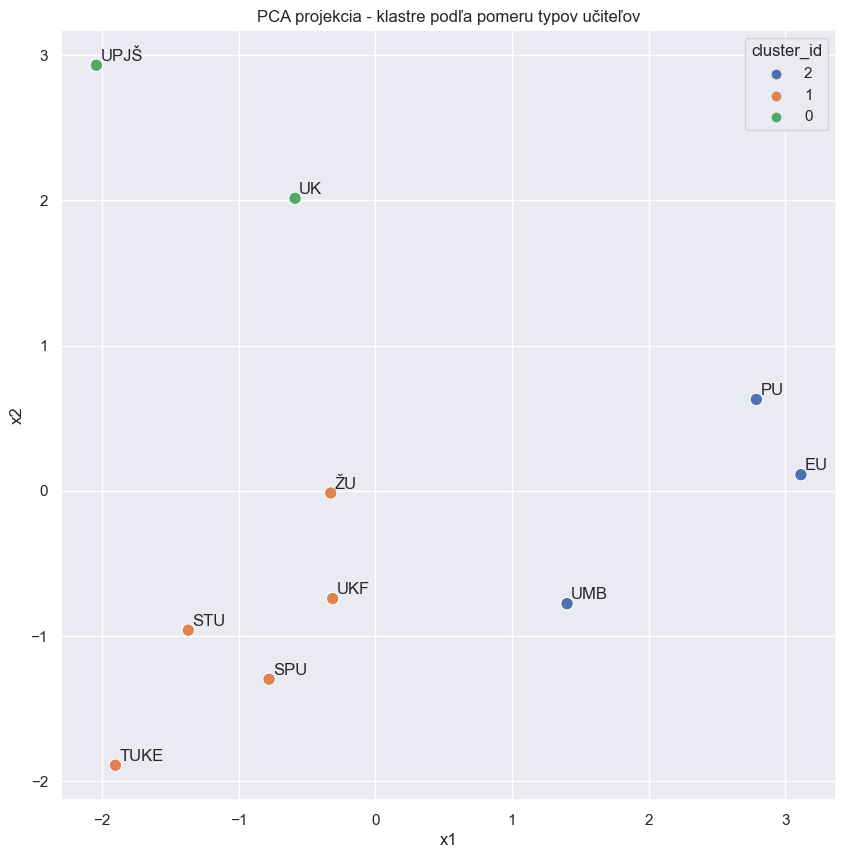

In [39]:
teachers_share['label'] = list(teachers_share.reset_index()['uni'].apply(lambda x: x if x in top10 else 'others'))
teachers_share
fig_pca, ax_pca = plt.subplots(figsize=(10, 10))
ax_pca.set_title('PCA projekcia - klastre podľa pomeru typov učiteľov')

sns.scatterplot(data=teachers_share, x="x1", y="x2", hue='cluster_id', s=80, ax=ax_pca)
for i, row in teachers_share.reset_index().iterrows():
    plt.annotate(row.uni, xy=(row.x1 + 0.03, row.x2 + 0.03))
plt.show()

In [40]:
display(teachers_share.query('cluster_id=="0"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="1"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="2"').drop(['hostujuci_profesor'], axis = 1))

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2020 UK    0.068610  0.216816  0.028251          0.555157  0.131166   
     UPJŠ  0.137671  0.213699  0.021233          0.488356  0.139041   

          cluster_id        x1        x2 label  
year uni                                        
2020 UK            0 -0.586178  2.014674    UK  
     UPJŠ          0 -2.040184  2.931177  UPJŠ

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2020 SPU   0.002317  0.310545  0.013905          0.533024  0.140209   
     STU   0.012293  0.280599  0.008017          0.532336  0.166756   
     TUKE  0.003318  0.337094  0.013271          0.485733  0.160584   
     UKF   0.000000  0.276291  0.019120          0.558317  0.146272   
     ŽU    0.017715  0.267493  0.041630          0.524358  0.148804   

          cluster_id        x1        x2 label  
year uni                                        
2020 SPU           1 -0.776448 -1.298464   SPU  
     STU           1 -1.367442 -0.960490   STU  
     TUKE          1 -1.900627 -1.890944  TUKE  
     UKF           1 -0.311595 -0.742882   UKF  
     ŽU            1 -0.325073 -0.015753    ŽU

asistent    docent    lektor  odborny_asistent  profesor cluster_id  \
year uni                                                                        
2020 EU   0.002268  0.235828  0.029478          0.648526  0.083900          2   
     PU   0.008985  0.238095  0.069182          0.582210  0.101527          2   
     UMB  0.003119  0.264033  0.018711          0.595634  0.118503          2   

                x1        x2 label  
year uni                            
2020 EU   3.114834  0.110762    EU  
     PU   2.788908  0.629402    PU  
     UMB  1.403805 -0.777482   UMB